# Face Signatures

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import random
import tensorflow as tf

# Preprocessing

In [85]:
faces_dir = "./data/MEG_face_stim/"
faces = np.array([plt.imread(faces_dir + f) for f in os.listdir(faces_dir)])

In [86]:
mid = 250
res = 96
span = 384
half = span // 2
step = 4
output = span // step
faces = faces[:, mid - half:mid + half:step, mid - half:mid + half:step]
faces = faces.reshape(-1, output, output, 1)
print(faces.shape)

(80, 96, 96, 1)


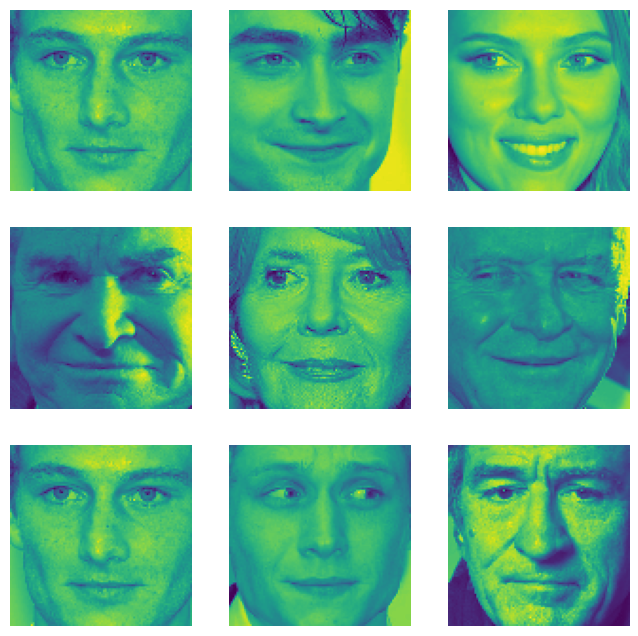

In [87]:
# visualize a few faces
plt.figure(figsize=(8, 8))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    r = random.randint(0, len(faces) - 1)
    plt.imshow(faces[r])
    plt.axis("off")
plt.show()

# Load the model

In [88]:
# create a preprocessing layer
class ImageTile(tf.keras.layers.Layer):
    # def __init__(self):
    #     super().__init__(trainable=False)

    def __init__(self, **kwargs):
        super(ImageTile, self).__init__(**kwargs)

    def call(self, inputs):
        return tf.tile(inputs, tf.constant([1, 1, 1, 3]))

In [89]:
# Load the model with the custom object
with tf.keras.utils.custom_object_scope({'ImageTile': ImageTile}):
    model = tf.keras.models.load_model("./saved/model.h5")

In [90]:
def show_images(img, feat):
    plt.imshow(img, cmap=plt.cm.gray)
    plt.scatter(feat[0::2], feat[1::2], c="r", marker="x")

def visualize_data(images, targets):
    for i in range(10):
        idx = np.random.randint(images.shape[0])
        plt.subplot(2, 5, i + 1)
        show_images(images[idx], targets[idx])
        plt.axis("off")
    plt.subplots_adjust(bottom=0.5)
    plt.show()

In [91]:
test_images = faces
test_images = tf.keras.applications.mobilenet_v2.preprocess_input(faces)
test_ds = tf.data.Dataset.from_tensor_slices((faces)).batch(64)

In [92]:
test_preds = model.predict(test_ds)

2/2 [==============================] - 1s 89ms/step


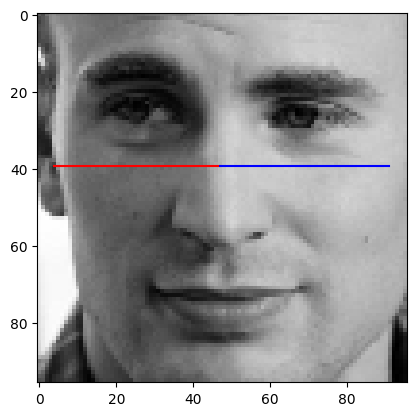

In [301]:
def show_images(img, feat):
    plt.imshow(img, cmap=plt.cm.gray)
    indices = [i for i in range(len(feat)) if i % 2 == 0]

    # eyeliner left
    sub1 = [4, 5]
    x1 = [feat[i*2] for i in sub1]
    y1 = [feat[i*2 + 1] for i in sub1]
    avgy1 = sum(y1) / len(y1)

    # eyeliner right
    sub2 = [2, 3]
    x2 = [feat[i*2] for i in sub2]
    y2 = [feat[i*2 + 1] for i in sub2]
    avgy2 = sum(y2) / len(y2)

    avg = (avgy1 + avgy2) / 2
    x_span1 = x1[1] - x1[0]
    x_span2 = x2[1] - x2[0]
    avg_x_span = (x_span1 + x_span2) / 2
    padding = avg_x_span * 42

    midpoint = (x1[0] + x2[0]) / 2


    # plot eyeliner
    y_offset = 1
    y_final = avg + y_offset
    plt.plot([midpoint, x1[1] - padding], [y_final, y_final], c="r")
    plt.plot([midpoint, x2[1] + padding], [y_final, y_final], c="b")

    
    # plt.scatter(x1, y1, c="black", marker="x")
    # plt.scatter(x2, y2, c="black", marker="x")

r = random.randint(0, len(test_images) - 1)
show_images(test_images[r], test_preds[r])
# z = 20
# show_images(test_images[z], test_preds[z])

[67.7589, 27.967741, 60.23199, 75.39413, 35.66659, 21.101076, 56.794506, 81.58643, 38.327232, 13.558325, 48.911842, 67.39551, 33.934204, 49.784935, 50.098522]


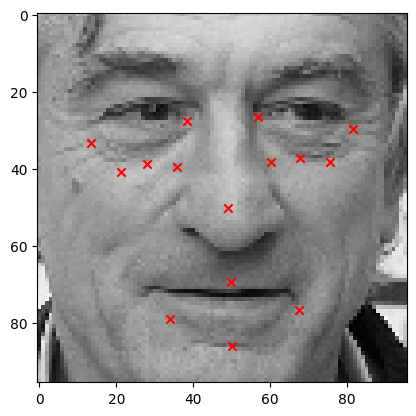